In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [22]:
c = cast
sup_bat = c[(c.character == 'Superman') | (c.character == 'Batman')]
g = sup_bat.groupby(['year', 'character']).size().unstack().fillna(0)

13

In [23]:
s = g.Superman - g.Batman
len(s[s > 0])

13

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [24]:
b = g.Batman - g.Superman
len(b[b > 0])

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [26]:
c = cast
c.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


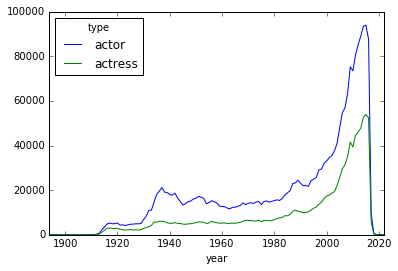

In [33]:
c.groupby(['year', 'type']).size().unstack(1).fillna(0).plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

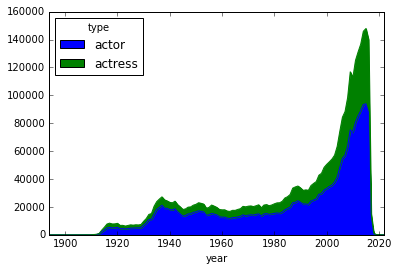

In [34]:
c.groupby(['year', 'type']).size().unstack(1).fillna(0).plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [35]:
d = c.groupby(['year', 'type']).size().unstack(1).fillna(0)
d.head()

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,0.0
1905,1.0,0.0
1906,14.0,3.0
1907,5.0,0.0


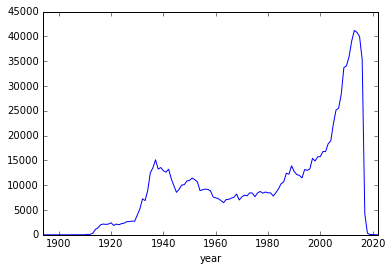

In [38]:
e = d.actor - d.actress
e.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

In [46]:
d = c.groupby(['year', 'type']).size().unstack(1)
f = d.actor / (d.actor + d.actress)

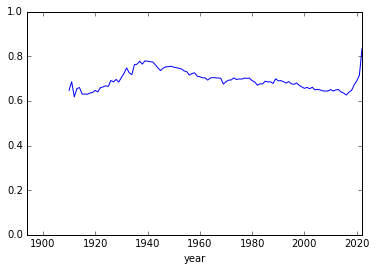

In [47]:
f.plot(ylim=(0, 1))

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [48]:
s = c[c.n == 2].groupby(['year', 'type']).size().unstack(1)

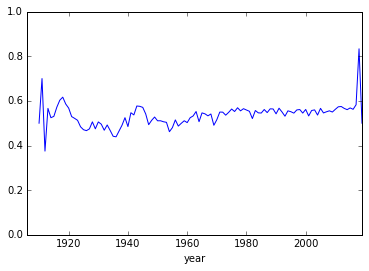

In [53]:
f = s.actor / (s.actor + s.actress)
f.plot(ylim=(0,1))

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [84]:
c = cast
c = c[c.n < 4]
r = c.groupby(['year', 'type', 'n']).size()
r

year  type     n  
1906  actor    1.0       2
               2.0       2
      actress  1.0       1
               2.0       1
               3.0       1
1907  actor    1.0       1
               2.0       1
               3.0       1
1908  actor    1.0       1
               2.0       2
               3.0       2
1909  actor    1.0       1
1910  actor    1.0       1
               2.0       2
               3.0       3
      actress  1.0       4
               2.0       2
1911  actor    1.0      17
               2.0      14
               3.0      15
      actress  1.0       9
               2.0       6
               3.0       4
1912  actor    1.0      15
               2.0       9
               3.0      14
      actress  1.0      12
               2.0      15
               3.0       5
1913  actor    1.0      81
                      ... 
2015  actor    1.0    2779
               2.0    2133
               3.0    2189
      actress  1.0    1241
               2.0    1619
         

In [85]:
r = r.unstack(1)
r.head()

type      actor  actress
year n                  
1906 1.0    2.0      1.0
     2.0    2.0      1.0
     3.0    NaN      1.0
1907 1.0    1.0      NaN
     2.0    1.0      NaN

In [86]:
s = r.actor/(r.actor + r.actress)

In [87]:
s.head()

year  n  
1906  1.0    0.666667
      2.0    0.666667
      3.0         NaN
1907  1.0         NaN
      2.0         NaN
dtype: float64

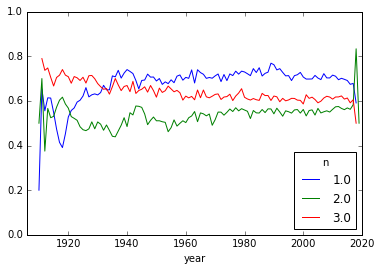

In [88]:
s.unstack().plot(ylim=(0,1))